<a href="https://colab.research.google.com/github/striderssoftware/Artificial_Intelligence/blob/main/TensorFlowModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Strider was here: now 2.18.0
28
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8609 - loss: 0.4759
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9499 - loss: 0.1668
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Example 0 prediction: Seven (23.2%)


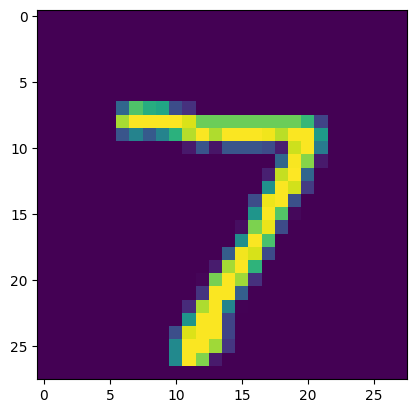

Example 1 prediction: Two (22.9%)


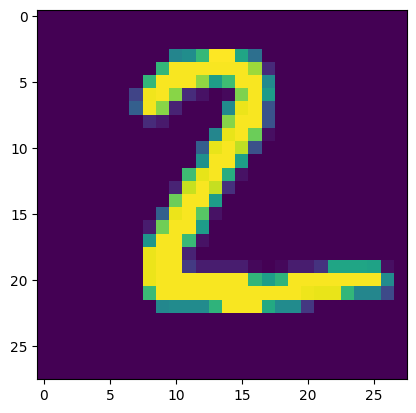

Example 2 prediction: One (23.1%)


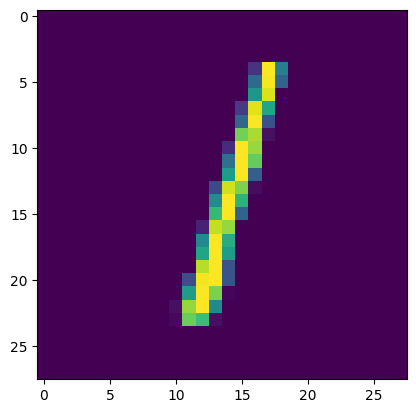

Example 3 prediction: Zero (23.2%)


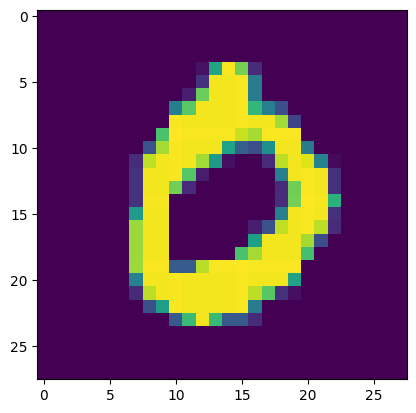

Example 4 prediction: Four (22.7%)


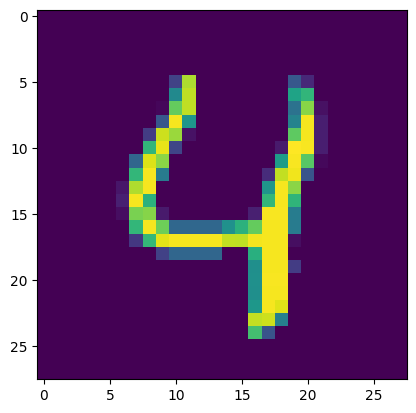

Example 5 prediction: One (23.1%)


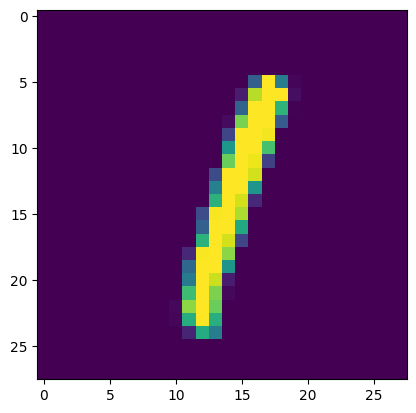

Example 6 prediction: Four (23.1%)


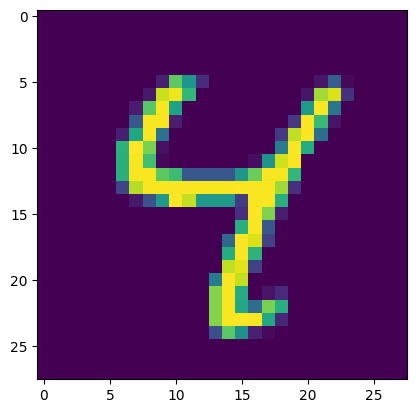

Example 7 prediction: Nine (23.0%)


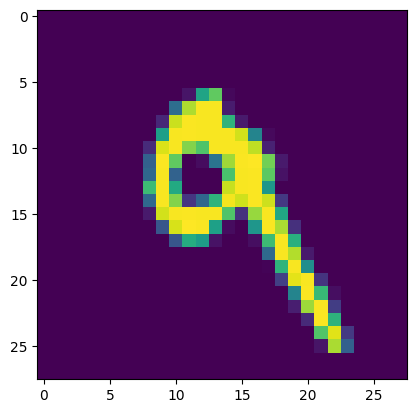

Example 8 prediction: Six (18.4%)


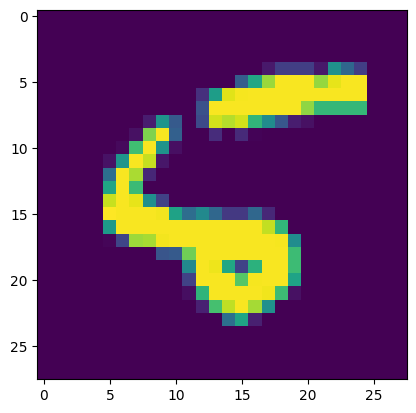

Example 9 prediction: Nine (23.0%)


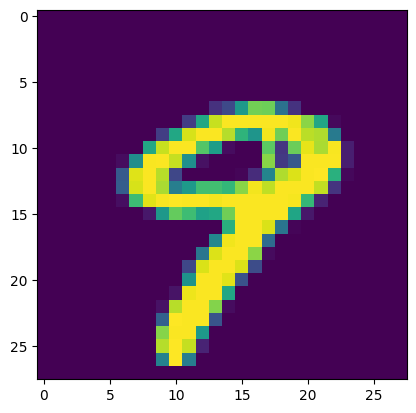

Example 10 prediction: Zero (23.2%)


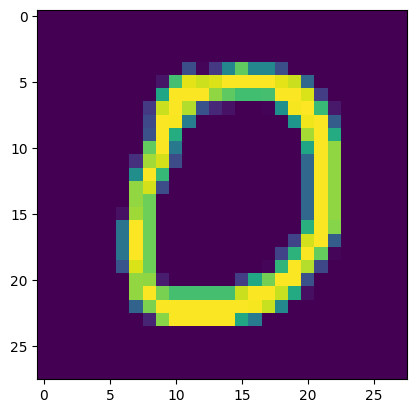

Example 11 prediction: Six (22.3%)
all doneeeeeee


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("Strider was here: now", tf.__version__)

# The TRAINING DATA - This defines the problem and the solution space
# From a business view -  An Entire New Industry of Acquisition,
# Labeling, and Structure of this training data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

n_features = x_train.shape[1]
print (n_features)


#  Building Mechanism NOT an Algorithm
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),   # The input, in the case the image
      tf.keras.layers.Dense(128, activation='relu'),   # hidden
      tf.keras.layers.Dropout(.2),                     # hidden
      tf.keras.layers.Dense(10)                        # The output layer, the solution space
    ])
# The hidden layers are the structure that ALLOWS the
# algorithm to work.  The algorithm is "written" into the weights
# using backpropagation and cost functions

#  Training
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
                            loss=loss_fn,
                            metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)  #epochs=25


#  Evaluation Metrics
evalResults = model.evaluate(x_test,y_test)

#  Results: Wrap the Model in a probability model for "results"
probability_model = tf.keras.Sequential([
      model,
      tf.keras.layers.Softmax()
    ])

#  Results: Query the Model
probResult = probability_model(x_test, training=False)   # Probability of Class Membership
predResult = probability_model.predict(x_test)           # Model Confidence of Class Membership

print ('\n\n')

#  Results: Map results into solution space
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
for i, logits in enumerate(predResult):  # probResults, predResults
    class_idx = tf.math.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]

    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))
    # output image
    if i > 10:
        break
    plt.figure()
    plt.imshow(x_test[i])
    plt.grid(False)
    plt.show()

print ("all doneeeeeee")

